# Analysis of Literacy Rates by Religion in Rural and Urban India For Age 7 and above*(2011)

## Target
The objective of this analysis is to visualize the literacy rates for various religions in India in the year 2011 and compare them to the national average literacy rate across all religions.

## Formula for Calculating Literacy Rate
The literacy rate for each religion is calculated using the following formula:

**`Literacy Rate (%) = (Number of Literates in Religion (7 and above) / Total Population of Religion (7 and above)) * 100`**

## Data Source
The data used for this analysis is sourced from the Census of India 2011. The original data can be downloaded from the `Census website`, or you can also find that file on our `GitHub repository`: [Main Excel file](https://github.com/Shubham18024/Census_Analysis/blob/main/CSV%20files%20for%201991%2C2001%2C2011/DDW-0000C-09-PC11C-09.xlsx).

## Refined Data
The data has been refined to focus on the literacy rates of different religions in rural and urban areas of India. The refined CSV file containing this information can be found on GitHub: [Refined Census Data](https://github.com/Shubham18024/Census_Analysis/blob/main/CSV%20files%20for%201991%2C2001%2C2011/Rural%26Urban_Rel_vs_Lit%2C_data_7%2B.csv)


## Visualization
Below is the code to generate a grouped bar chart to visualize the `literacy rates for different religions in rural and urban India`, along with a comparison to the national average literacy rate.

`*It also Include Age not stated`

In [2]:
import pandas as pd
import plotly.graph_objects as go
df=pd.read_csv(r"C:\Users\saim\Just_one_for_all\Desktop\Excel\Rural&Urban_Rel_vs_Lit,_data_7+.csv")
df

,State,State_code,T_P_India,L_P_India,L_R_India(in %),T_P_Hindu,L_P_Hindu,L_R_Hindu(in %),T_P_Muslim,L_P_Muslim,...,L_R_Sikh(in %),T_P_Buddhist,L_P_Buddhist,L_R_Buddhist(in %),T_P_Jain,L_P_Jain,L_R_Jain(in %),T_P_Other religions and persuasions,L_P_Other religions and persuasions,L_R_Other religions and persuasions(in %)
0,India_Rural,0,"71,24,25,987","48,27,93,835",67.77%,"58,72,49,711","40,00,34,298",68.12%,"8,50,91,374","5,36,44,364",...,70.93%,"42,20,645","32,37,070",76.70%,"8,15,743","7,22,596",88.58%,"60,22,004","34,78,970",57.77%
1,India_Urban,0,"33,39,13,737","28,08,44,977",84.11%,"25,14,97,925","21,45,44,994",85.31%,"5,88,54,191","4,50,14,558",...,86.51%,"32,40,448","28,27,713",87.26%,"32,39,270","31,24,995",96.47%,"6,48,932","5,16,887",79.65%


In [3]:
df.columns

Index(['State', 'State_code', 'T_P_India', 'L_P_India', 'L_R_India(in %)',
       'T_P_Hindu', 'L_P_Hindu', 'L_R_Hindu(in %)', 'T_P_Muslim', 'L_P_Muslim',
       'L_R_Muslim(in %)', 'T_P_Christian', 'L_P_Christian',
       'L_R_Christian(in %)', 'T_P_Sikh', 'L_P_Sikh', 'L_R_Sikh(in %)',
       'T_P_Buddhist', 'L_P_Buddhist', 'L_R_Buddhist(in %)', 'T_P_Jain',
       'L_P_Jain', 'L_R_Jain(in %)', 'T_P_Other religions and persuasions',
       'L_P_Other religions and persuasions',
       'L_R_Other religions and persuasions(in %)'],
      dtype='object')

# Analysis of Rural and Urban Population by Religion in India For Age 7 and above*(2011)


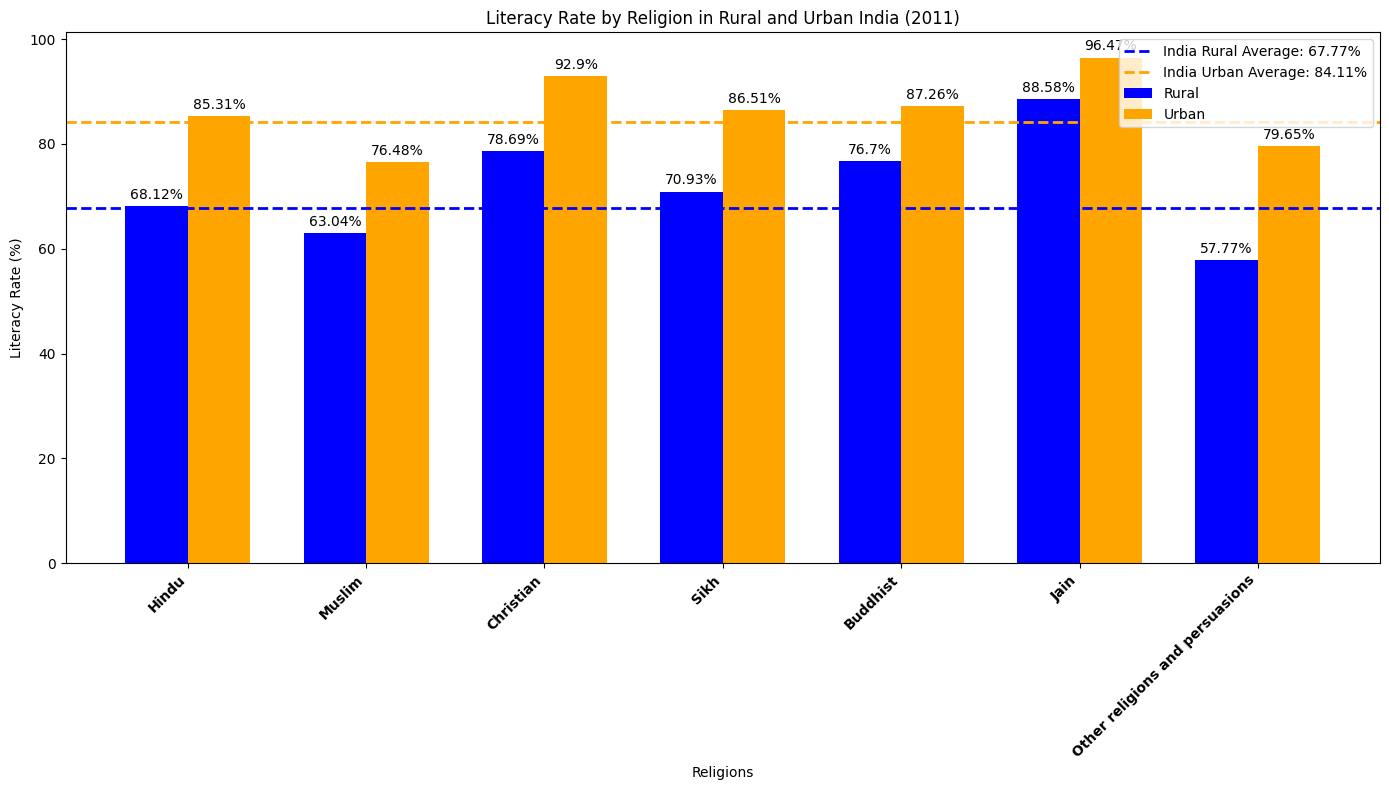

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and already imported

# List of religions
religions = ['Hindu', 'Muslim', 'Christian', 'Sikh', 'Buddhist', 'Jain', 'Other religions and persuasions']

# Extract rural and urban literacy rates for each religion
rural_lit_rates = df[df['State'] == 'India_Rural'][[f'L_R_{rel}(in %)' for rel in religions]].values.flatten()
urban_lit_rates = df[df['State'] == 'India_Urban'][[f'L_R_{rel}(in %)' for rel in religions]].values.flatten()

# Convert percentages to floats
rural_lit_rates = [float(rate.strip('%')) for rate in rural_lit_rates]
urban_lit_rates = [float(rate.strip('%')) for rate in urban_lit_rates]

# Extract overall literacy rates for India
india_rural_lit_rate = float(df[df['State'] == 'India_Rural']['L_R_India(in %)'].values[0].strip('%'))
india_urban_lit_rate = float(df[df['State'] == 'India_Urban']['L_R_India(in %)'].values[0].strip('%'))

# Define the positions for the bars
x = np.arange(len(religions))

# Width of a bar
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))

# Add bars for rural and urban literacy rates
bars1 = ax.bar(x - width/2, rural_lit_rates, width, label='Rural', color='blue')
bars2 = ax.bar(x + width/2, urban_lit_rates, width, label='Urban', color='orange')

# Add horizontal lines for average literacy rates
ax.axhline(y=india_rural_lit_rate, color='blue', linestyle='--', linewidth=2, label=f'India Rural Average: {india_rural_lit_rate}%')
ax.axhline(y=india_urban_lit_rate, color='orange', linestyle='--', linewidth=2, label=f'India Urban Average: {india_urban_lit_rate}%')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Religions')
ax.set_ylabel('Literacy Rate (%)')
ax.set_title('Literacy Rate by Religion in Rural and Urban India (2011)')
ax.set_xticks(x)
ax.set_xticklabels(religions, rotation=45, ha='right', fontweight='bold')
ax.legend()

# Attach a text label above each bar, displaying its height
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()


# To View Output in GitHub

GitHub Pages is deployed for that output. You can view it directly using the following link:

<a href="https://shubham18024.github.io/Census_Analysis/Shubham18024/literacy_rate_by_religion(7%20and%20above).html" target="_blank">View Literacy Rate by Religion(7 and above)</a>


---

### Disclaimer

This analysis is done solely for educational purposes. It is not intended to hurt any religious sentiments or beliefs. The data is sourced from the official census website, and the analysis aims to provide insights into literacy rates among different religions in India.


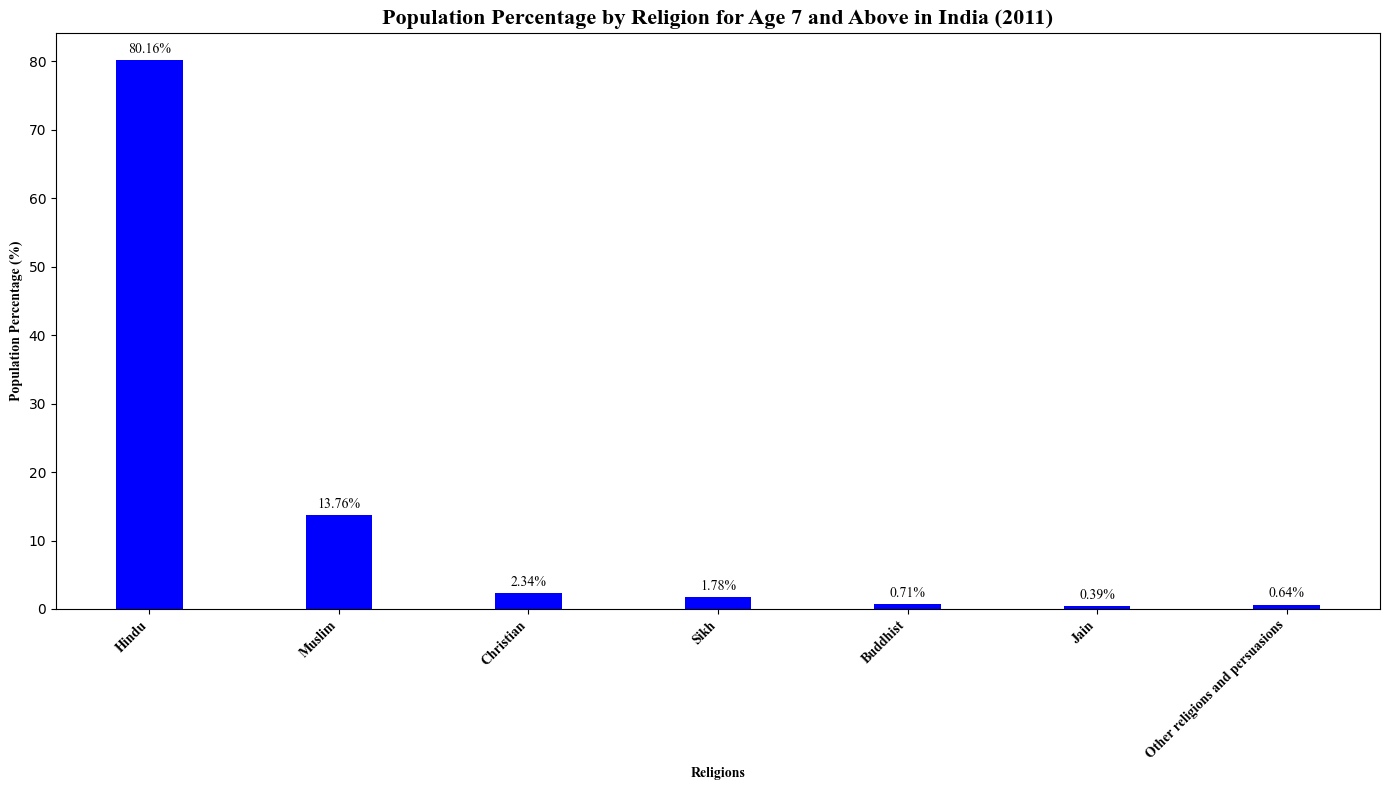

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and already imported
# Example DataFrame (df) structure for reference:
# df = pd.DataFrame({
#     'State': ['India_Rural', 'India_Urban'],
#     'T_P_India': [800000, 200000],
#     'T_P_Hindu': [600000, 150000],
#     'T_P_Muslim': [100000, 30000],
#     'T_P_Christian': [50000, 10000],
#     'T_P_Sikh': [30000, 5000],
#     'T_P_Buddhist': [10000, 3000],
#     'T_P_Jain': [5000, 2000],
#     'T_P_Other religions and persuasions': [5000, 2000]
# })

# Extract total population data for each religion
total_population_india = df['T_P_India'].sum()
religions = ['Hindu', 'Muslim', 'Christian', 'Sikh', 'Buddhist', 'Jain', 'Other religions and persuasions']

# Calculate population percentages
population_percentages = [df[f'T_P_{rel}'].sum() / total_population_india * 100 for rel in religions]

# Define the positions for the bars
x = np.arange(len(religions))

# Width of a bar
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))

# Add bars for population percentages
bars = ax.bar(x, population_percentages, width, color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Religions', fontweight='bold', fontname='Times New Roman')
ax.set_ylabel('Population Percentage (%)', fontweight='bold', fontname='Times New Roman')
ax.set_title('Population Percentage by Religion for Age 7 and Above in India (2011)', fontweight='bold', fontname='Times New Roman', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(religions, rotation=45, ha='right', fontweight='bold', fontname='Times New Roman')

# Attach a text label above each bar, displaying its height
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontname='Times New Roman')

autolabel(bars)

fig.tight_layout()

plt.show()
